# Measuring Variability and spread


## "Range" to diffrentiate dataset

So far we’ve looked at calculating averages for sets of data, but quite often, the average only gives part of the picture. Averages give us a way of determining where the center of a set of data is, but they don’t tell us how
the data varies. Each player has the same average score, but there are clear differences between each data set. We need some other way of measuring these differences.

<img src="./data/images/stat42.png"> 

We can differentiate between each set of data by looking at the way in which the scores spread out from the average. Each player’s scores are distributed differently, and if we can measure how the scores are dispersed, the coach will be able to make a more informed decision.

## Measuring the range

We can easily do this by calculating the ***range***. The range tells us over how many numbers the data extends, a bit like measuring its width. To find the range, we take the largest number in the data set, and then subtract the smallest. The smallest value is called the ***lower bound***, and the largest value is the ***upper bound***.

Let’s take a look at the set of scores for one of the players and see how this works. Here are the scores:

<img src="./data/images/stat43.png"> 

To calculate the range, we subtract the lower bound from the upper bound. Looking at the data, the smallest value is 7, which means that this is the lower bound. Similarly, the upper bound is the largest value,or 13. Subtracting the lower bound from the upper bound gives us:

Range $=$ upper bound - lower bound

      = 13 - 7
       
      = 6
      
      so, the range is 6
      
Note: *The range is a way of measuring how spread out a set of values are. It’s given by Upper bound - Lower bound
where the upper bound is the highest value, and the lower bound the lowest.*

In [13]:
# import required librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Importing India premere league dataset

In [14]:
dataset = pd.read_csv('./data/IPL_venue_won.csv')
print(dataset.keys())
print('\n')
print(dataset.info())

dataset.head()

Index(['Venue_Name', 'Won_By'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
Venue_Name    577 non-null object
Won_By        568 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB
None


,Venue_Name,Won_By
0,M Chinnaswamy Stadium,140.0
1,"Punjab Cricket Association Stadium, Mohali",33.0
2,Feroz Shah Kotla,9.0
3,Wankhede Stadium,5.0
4,Eden Gardens,5.0


Visualizing histogram

In [15]:
dataset['Venue_Name'].nunique()

35

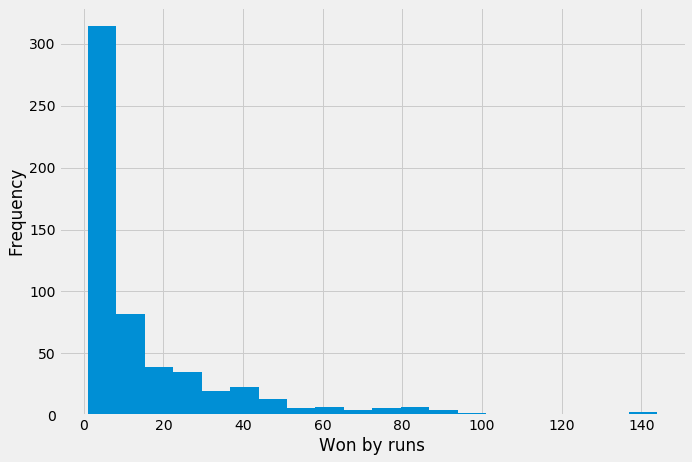

In [16]:
plt.figure(figsize=(10,7))
dataset['Won_By'].plot.hist(bins = 20)
plt.xlabel('Won by runs')
plt.show()

In [17]:
Range = dataset['Won_By'].max() - dataset['Won_By'].min()
print('The Range of dataset is {}'.format(Range))

The Range of dataset is 143.0


The range is a simple way of saying what the spread of a set of data is, but it’s often not the best way of measuring how the data is distributed within that range. If your data has outliers, using the range to describe how your values are dispersed can be very misleading because of its sensitivity to **outliers**.

The primary problem with the range is that it only describes the width of your data. Because the range is calculated using the most extreme values of the data, it’s impossible to tell what that data actually looks like—and whether it contains outliers. There are many different ways of constructing the same range, and sometimes this additional information is important.

# Box Plot

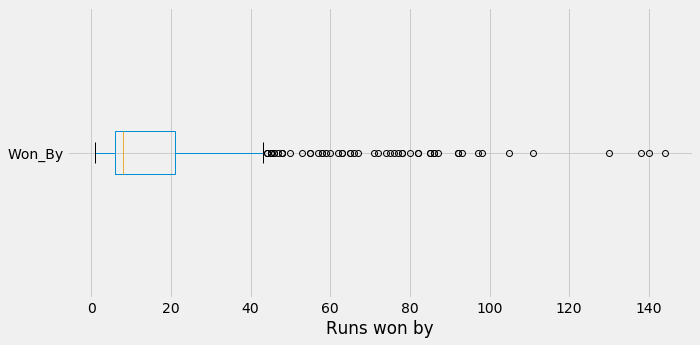

In [18]:
plt.figure(figsize=(10,5))
dataset['Won_By'].plot.box(vert = False)
plt.xlabel('Runs won by')
plt.show()

# Variance

The variance is a way of measuring spread, and it’s the average of the distance of values from the mean squared.

This method of measuring spread is called the variance, and it’s a very common way of describing the spread of a set of data.
Here’s a general form of the equation:
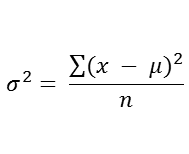

# Standard Deviation
Statisticians use the variance a lot as a means of measuring the spread of data. It’s useful because it uses every value to come up with the result, and it can be thought of as the average of the distances from the mean squared.

All we need to do is take the square root of the variance. We call this the ***standard deviation***.

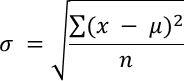

In [19]:
print('Variance :',dataset.var())
print('Standard Deviation :',dataset.std())

Variance : Won_By    479.970511
dtype: float64
Standard Deviation : Won_By    21.908229
dtype: float64


# Z - Scores

***Z – score is measure of distance from mean***. Units for Z- score is “standard deviation”It help to find answer for question below.

How far is any given data point from the mean ? (Distance)

    Z – score can help us answer

How many standard deviation away (above and below) from the mean is a data point ?




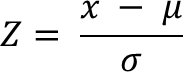

In [20]:
dataset.head()

,Venue_Name,Won_By
0,M Chinnaswamy Stadium,140.0
1,"Punjab Cricket Association Stadium, Mohali",33.0
2,Feroz Shah Kotla,9.0
3,Wankhede Stadium,5.0
4,Eden Gardens,5.0


In [21]:
dataset['Z-Score'] = (dataset['Won_By'] - dataset['Won_By'].mean())/ dataset['Won_By'].std()
dataset.head()

,Venue_Name,Won_By,Z-Score
0,M Chinnaswamy Stadium,140.0,5.598337
1,"Punjab Cricket Association Stadium, Mohali",33.0,0.714327
2,Feroz Shah Kotla,9.0,-0.381151
3,Wankhede Stadium,5.0,-0.563731
4,Eden Gardens,5.0,-0.563731


z score visualization

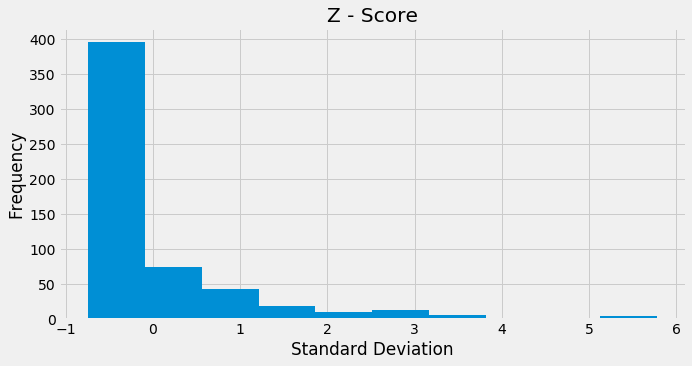

In [22]:
plt.figure(figsize=(10,5))
ax = plt.gca()
dataset['Z-Score'].plot.hist(ax = ax)
plt.xlabel('Standard Deviation')
plt.title('Z - Score')
plt.show()


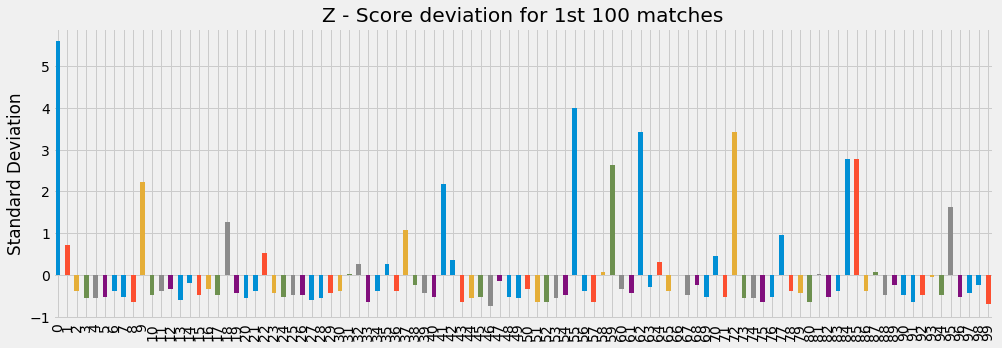

In [23]:
plt.figure(figsize=(15,5))
ax = plt.gca()
dataset['Z-Score'][:100].plot.bar(ax = ax)
plt.ylabel('Standard Deviation')
plt.title('Z - Score deviation for 1st 100 matches')
plt.show()

So,list of matches whos run be score is greater that **3 times standard deviation (outlier)** is:

In [26]:
dataset[dataset['Z-Score'] >= 3]

,Venue_Name,Won_By,Z-Score
0,M Chinnaswamy Stadium,140.0,5.598337
55,Wankhede Stadium,105.0,4.000764
62,St George's Park,92.0,3.407379
72,St George's Park,92.0,3.407379
123,Feroz Shah Kotla,98.0,3.681249
220,M Chinnaswamy Stadium,85.0,3.087865
236,Himachal Pradesh Cricket Association Stadium,111.0,4.274633
320,"MA Chidambaram Stadium, Chepauk",86.0,3.133510
343,Sawai Mansingh Stadium,87.0,3.179155
344,Feroz Shah Kotla,86.0,3.133510
